# Experiment 7 : Grow of stables attractors fields in Aleatory CBN with diferents number of edges

This experiment explore the growth of local networks in CBN with Aleatory topology. Its important see what happened with the Linear CBN with more edges

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the database
df = pd.read_csv("outputs/exp8_data_5_20_1000/data.csv")
df.keys()

Index(['i_sample', 'n_local_networks', 'n_var_network', 'v_topology',
       'n_output_variables', 'n_clauses_function', 'n_edges',
       'n_local_attractors', 'n_pair_attractors', 'n_attractor_fields',
       'n_time_find_attractors', 'n_time_find_pairs', 'n_time_find_fields'],
      dtype='object')

## Basics Estatistics

In [59]:
# Seleccionar las columnas requeridas y crear una copia del DataFrame
df_resume = df[['n_local_networks', 'n_local_attractors', 'n_pair_attractors', 'n_attractor_fields']].copy()

# Ver un resumen estadístico del nuevo DataFrame
df_resume.describe()

,n_local_networks,n_local_attractors,n_pair_attractors,n_attractor_fields
count,4000.0,4000.000000,4000.000000,4.000000e+03
mean,5.0,32.083000,141.823000,4.194284e+04
std,0.0,24.753501,404.759325,1.214956e+06
min,5.0,10.000000,0.000000,0.000000e+00
25%,5.0,18.000000,17.000000,1.000000e+00
50%,5.0,25.000000,48.000000,3.200000e+01
75%,5.0,40.000000,128.000000,4.732500e+02
max,5.0,310.000000,13998.000000,7.054387e+07


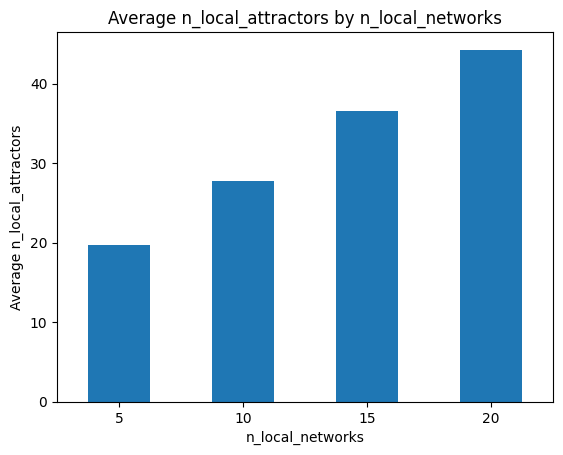

In [60]:
# Group by 'n_local_networks' and calculate the mean of 'n_local_attractors'
grouped_data = df.groupby('n_var_network')['n_local_attractors'].mean()

# Create the histogram
grouped_data.plot(kind='bar')

# Customize the plot
plt.title('Average n_local_attractors by n_local_networks')
plt.xlabel('n_local_networks')
plt.ylabel('Average n_local_attractors')
plt.xticks(rotation=0)  # Rotate the x-axis labels for better readability

# Show the plot
plt.show()

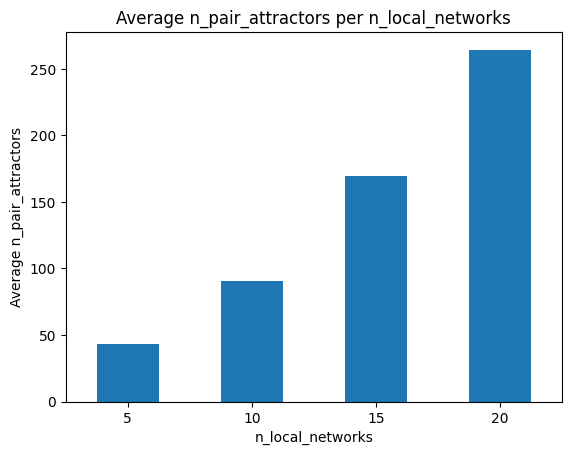

In [61]:
# Group by 'n_local_networks' and calculate the mean of 'n_pair_attractors'
grouped_data = df.groupby('n_var_network')['n_pair_attractors'].mean()

# Create the bar plot with different colors for each column
grouped_data.plot(kind='bar')

# Customize the plot
plt.title('Average n_pair_attractors per n_local_networks')
plt.xlabel('n_local_networks')
plt.ylabel('Average n_pair_attractors')
plt.xticks(rotation=0)  # Rotate the x-axis labels for better readability

# Show the plot
plt.show()

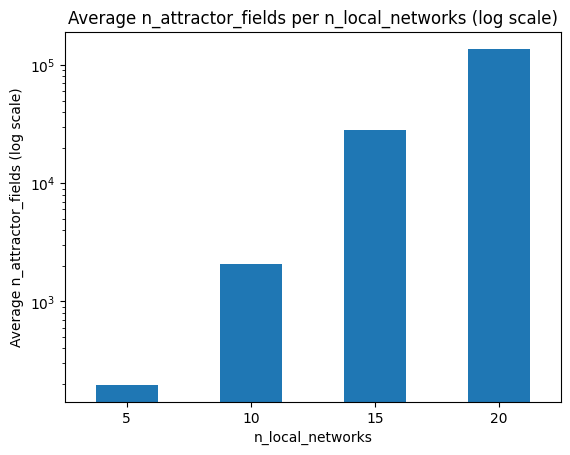

In [62]:
# Group by 'n_local_networks' and calculate the mean of 'n_attractor_fields'
grouped_data = df.groupby('n_var_network')['n_attractor_fields'].mean()

# Create the bar plot with logarithmic scale on the y-axis and different colors
grouped_data.plot(kind='bar', logy=True)

# Customize the plot
plt.title('Average n_attractor_fields per n_local_networks (log scale)')
plt.xlabel('n_local_networks')
plt.ylabel('Average n_attractor_fields (log scale)')
plt.xticks(rotation=0)  # Rotate the x-axis labels for better readability

# Show the plot
plt.show()

## Advanced Statistics

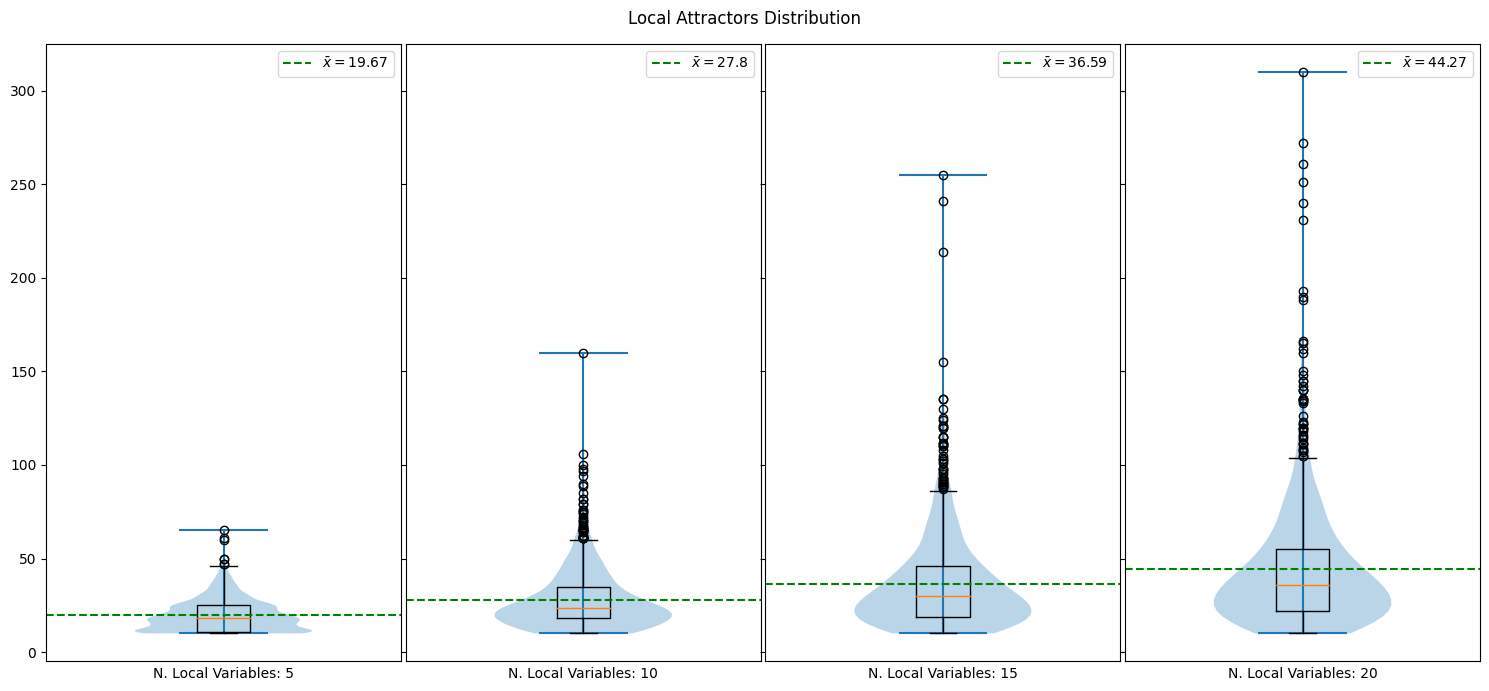

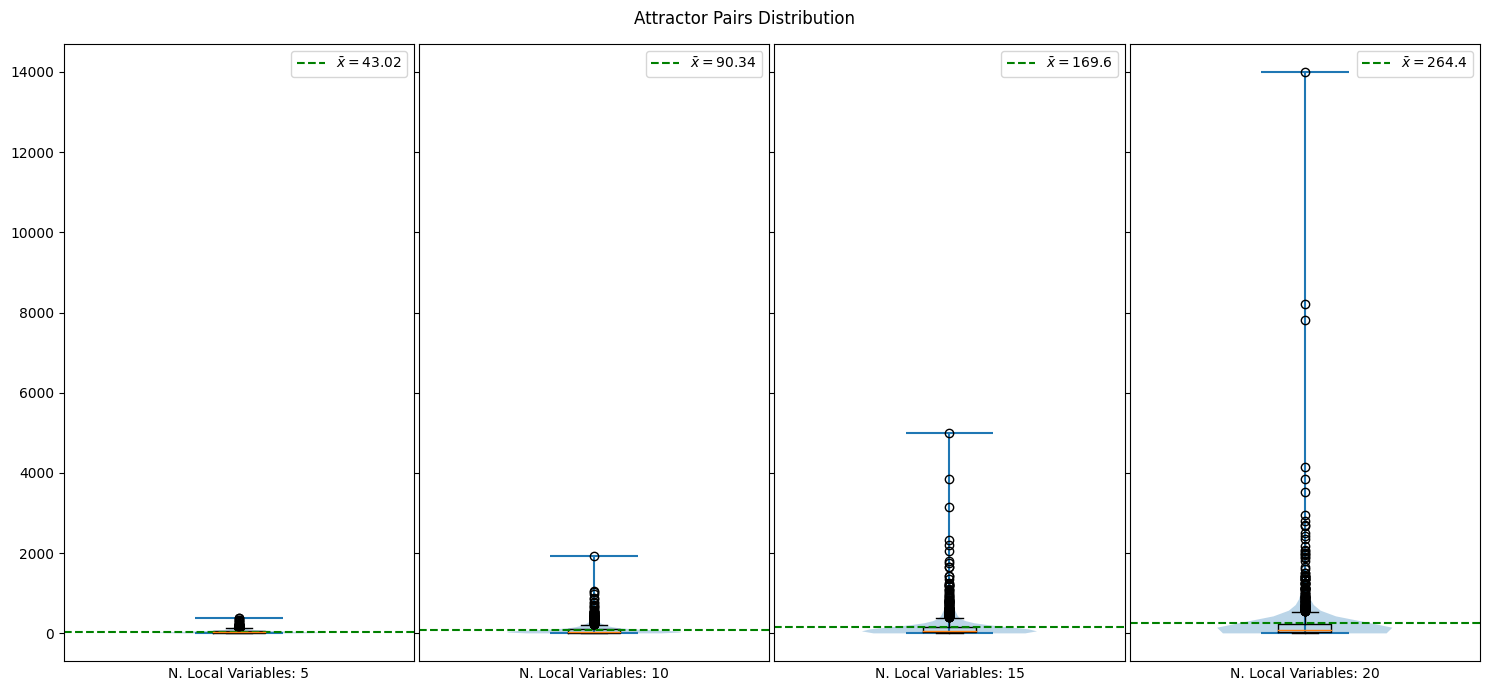

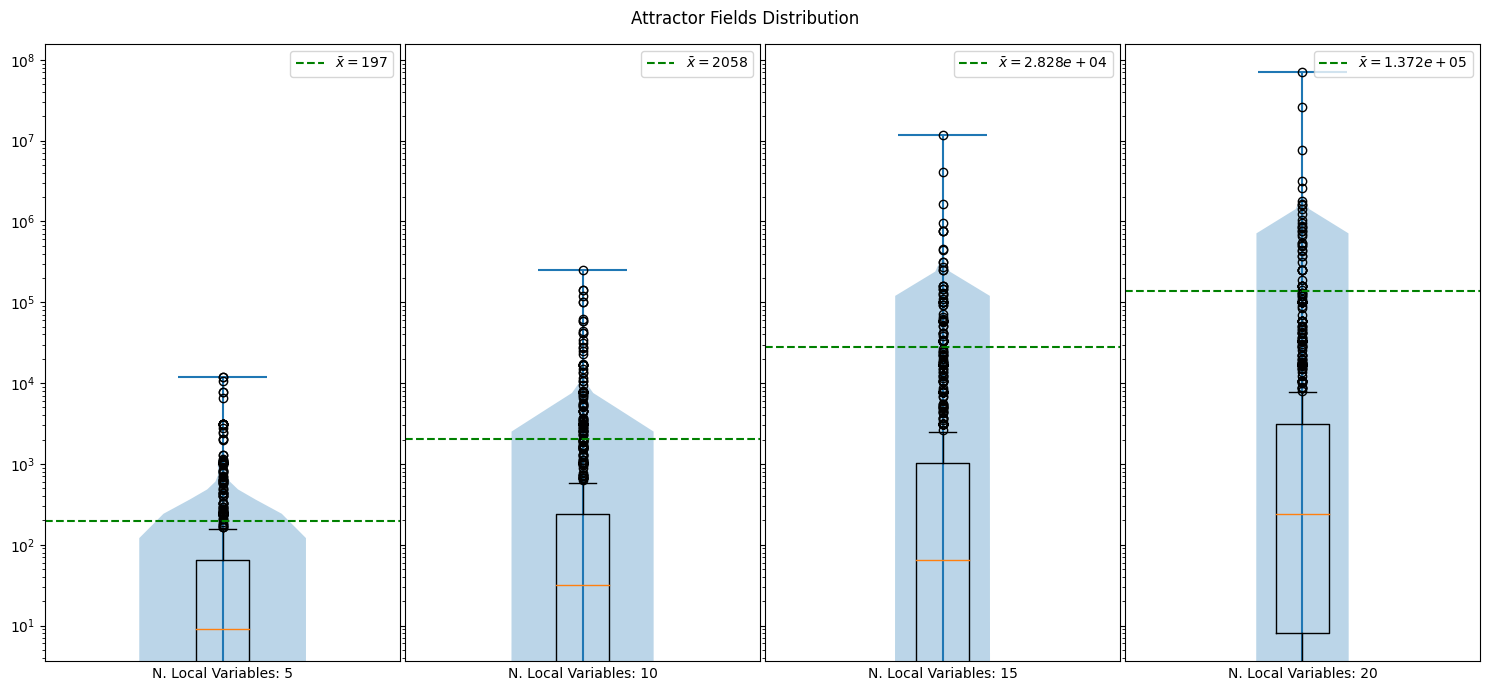

In [63]:
# Obtain the last unique values of n_var_network
n_var_networks_unique = df['n_var_network'].unique()
# n_local_networks_last_three = sorted(n_local_networks_unique)[-3:]
n_var_networks_last_three = sorted(n_var_networks_unique)

# Violin graphs
attributes = ['n_local_attractors', 'n_pair_attractors', 'n_attractor_fields']
titles = ['Local Attractors', 'Attractor Pairs', 'Attractor Fields']

for attribute, title in zip(attributes, titles):
    fig, axs = plt.subplots(1, len(n_var_networks_last_three), sharey=True, figsize=(15, 7))

    for i, n_var_network in enumerate(n_var_networks_last_three):
        data = df[df['n_var_network'] == n_var_network][attribute]

        axs[i].violinplot(data)
        axs[i].boxplot(data)
        axs[i].set_xlabel(f'N. Local Variables: {n_var_network}')
        axs[i].set_xticks([])
        axs[i].set_xlim((0.5, 1.5))

        mean = data.mean()
        std_dev = data.std()
        axs[i].axhline(mean, color='g', ls='--', label=fr'$\bar{{x}}={mean:.4g}$')
        axs[i].legend()

        if attribute == 'n_attractor_fields':  # Apply log scale only on the last attribute
            axs[i].set_yscale('log')

    fig.suptitle(f'{title} Distribution')
    fig.tight_layout(w_pad=0)

plt.show()

In [64]:
# Filtra las filas donde 'n_edges' es igual a 12 y 'n_local_networks' es igual a 6
filtered_df = df[(df['n_var_network'] == 20)]
# Selecciona las columnas específicas que deseas mantener
filtered_df = filtered_df[['n_local_networks', 'n_var_network', 'n_local_attractors', 'n_pair_attractors', 'n_attractor_fields']]
filtered_df.describe()

,n_local_networks,n_var_network,n_local_attractors,n_pair_attractors,n_attractor_fields
count,1000.0,1000.0,1000.000000,1000.000000,1.000000e+03
mean,5.0,20.0,44.275000,264.381000,1.372355e+05
std,0.0,0.0,33.482719,701.393355,2.394227e+06
min,5.0,20.0,10.000000,0.000000,0.000000e+00
25%,5.0,20.0,22.000000,30.750000,8.000000e+00
50%,5.0,20.0,36.000000,95.000000,2.430000e+02
75%,5.0,20.0,55.000000,235.000000,3.125000e+03
max,5.0,20.0,310.000000,13998.000000,7.054387e+07


## Dispersion Graph

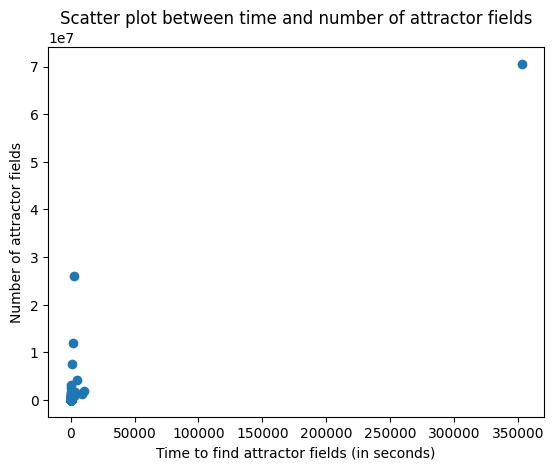

In [65]:
# Create a scatter plot
plt.scatter(df['n_time_find_fields'], df['n_attractor_fields'])
plt.xlabel('Time to find attractor fields (in seconds)')
plt.ylabel('Number of attractor fields')
plt.title('Scatter plot between time and number of attractor fields')
plt.show()

## Power-Law Distribution

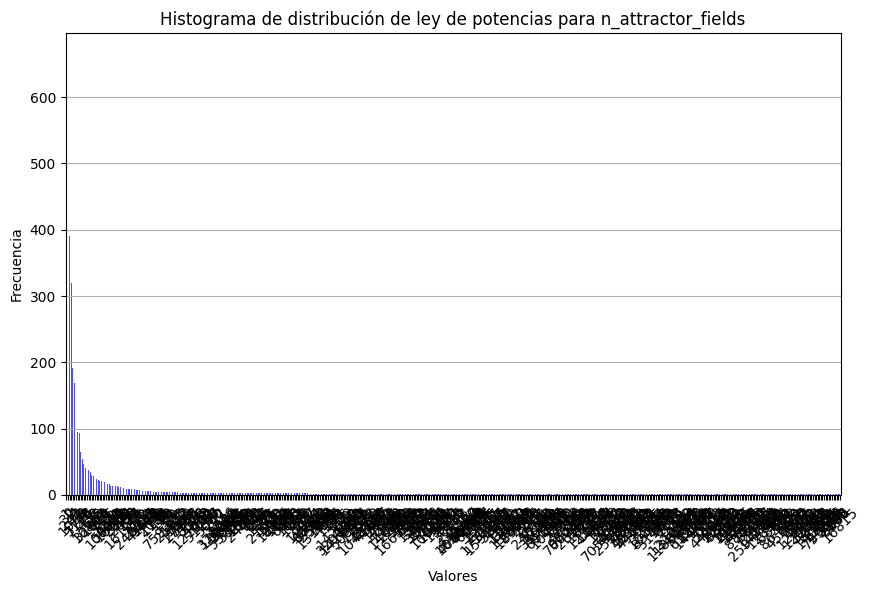

In [66]:
# Calcular el histograma de frecuencias
histogram = df['n_attractor_fields'].value_counts()

# Graficar el histograma
plt.figure(figsize=(10, 6))
histogram.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Histograma de distribución de ley de potencias para n_attractor_fields')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

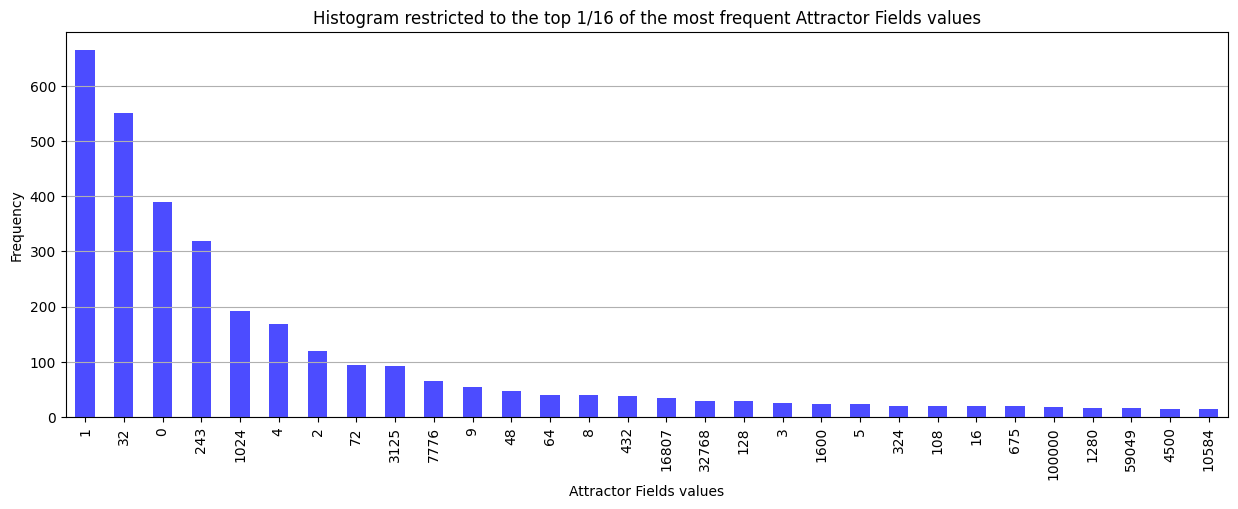

In [67]:
import matplotlib.pyplot as plt

# Calculate the frequency histogram
histogram = df['n_attractor_fields'].value_counts()

# Sort the histogram in descending order and select a fraction of the most frequent values
fraction = 16  # Change this to 2 for half, 4 for a quarter, etc.
top_n_values = int(len(histogram) / fraction)
filtered_histogram = histogram.head(top_n_values)

# Plot the histogram
plt.figure(figsize=(15, 5))  # Adjust the figure size (width, height)
filtered_histogram.plot(kind='bar', color='blue', alpha=0.7)
plt.title(f'Histogram restricted to the top 1/{fraction} of the most frequent Attractor Fields values')
plt.xlabel('Attractor Fields values')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(axis='y')

plt.show()